

# Background:
Netflix dataset was scraped from TMDB’s API to analyze Movies and TV Shows available on Netflix.
It contains metadata for 4000 records across 16 columns, including title, release date, genres, ratings, votes, popularity, and language information.
Before analysis, we need to inspect data quality issues like missing values, duplicates, wrong data types, and inconsistencies.

## project Title:
Netflix Content Strategy: What Types of Content Perform Best?
## Business Problem:
Netflix has thousands of movies and TV shows in different genres and languages. But they can't keep everything or buy everything - they need to choose wisely. The problem is: Which types of content should Netflix focus on to keep audiences happy and engaged?
## Objective:
Find out which genres (like Action, Drama, Comedy), content types (Movies vs TV Shows), and languages get the best ratings and audience engagement on Netflix. Use this information to recommend what types of content Netflix should prioritize in the future.



#  Netflix Content Strategy: What Types of Content Perform Best?

## **1. Approach (Data Analysis)**

### **Data Cleaning & Preparation**

* Handle missing values in categorical columns like `rating_category`, `popularity_category`, and `vote_reliability`.
* Drop irrelevant columns (already done). Keep only meaningful features for analysis.
* Ensure proper data formatting:

  * Convert categorical columns (`type`, `language`, `primary_genre`, `language_grouped`, `rating_category`, `popularity_category`, `vote_reliability`) into **category type**.
  * Convert boolean flags (`recent_release`, `is_hit`) into **True/False**.
  * Keep numerical columns (`rating`, `num_votes`, `popularity_score`, `engagement_score`) as numeric.

---

### **Exploratory Data Analysis (EDA)**

**Univariate Analysis (single variable):**

* Distribution of `rating` (viewer ratings).
* Distribution of `num_votes` (audience engagement).
* Frequency counts of `type` (Movies vs TV Shows).
* Popularity categories distribution (`popularity_category`).
* Genre and language distribution.

**Bivariate Analysis (two variables):**

* `rating` vs. `type` → Do TV Shows or Movies have higher ratings?
* `rating` vs. `primary_genre` → Which genres get better ratings?
* `popularity_score` vs. `language` → Which languages are most popular?
* `engagement_score` vs. `type` → Which format keeps viewers more engaged?
* `is_hit` vs. `primary_genre` → Which genres deliver more “hits”?

**Multivariate Analysis (multiple factors):**

* Impact of **genre + type + release_year** on ratings.
* Interaction between **language + genre** on popularity.
* Which **combinations** (e.g., Korean Drama TV Shows, Spanish Comedy Movies) get both high ratings and engagement.

---

### **Trend Analysis**

* Yearly release trends: number of titles, ratings, and hits per year (`release_year`).
* Genre evolution: Which genres gained/lost popularity over time.
* TV Shows vs Movies over years: Is there a shift in audience preference?
* Language trends: Growth of non-English content.

---

### **Outlier Detection**

* Identify **very low-rated** content (audience rejects).
* Identify **exceptionally high-rated** and **high-engagement** titles (audience favorites).
* Check reliability of outliers with `vote_reliability`.

---

### **Visualization & Reporting**

* Bar plots → Genres, Types, Languages distribution.
* Histograms → Ratings, Votes distribution.
* Box plots → Detect rating outliers.
* Scatter plots → Ratings vs Votes, Popularity vs Engagement.
* Line charts → Yearly and trend analysis.
* Heatmaps → Correlation between numeric metrics.

**Deliverable:**
A clear report showing **which genres, languages, and content types perform best**, guiding Netflix in **content acquisition & production strategy**.

---

## **2. Expected Insights**

* **Content Type**: Whether Movies or TV Shows attract more engagement and ratings.
* **Top Genres**: Which genres (Drama, Action, Comedy, Thriller) consistently perform best.
* **Language Advantage**: Which languages (English, Korean, Spanish, Hindi, etc.) have the highest ratings and popularity.
* **Audience Engagement**: Whether engagement is more strongly linked to `genre`, `language`, or `type`.
* **Trend Shifts**: How preferences changed across release years (rise of K-Dramas, Spanish series, etc.).
* **Outliers**: Spot hidden gems (very high-rated with few votes) or unexpected flops.
* **Content Strategy**: Recommend specific combinations (e.g., “Korean Thriller TV Shows” or “Spanish Comedy Movies”) that Netflix should prioritize.

---

## **3. Constraints**

* **Data Quality Issues**: Some categories may still have missing or noisy values.
* **Outliers**: Extremely high or low ratings with few votes may distort analysis.
* **Genre/Language Ambiguity**: Content may overlap multiple genres or languages.
* **Audience Preferences Shift**: Trends are time-dependent and may change quickly.
* **Interpretability**: Must present insights in a simple, visual way for non-technical stakeholders.

---

## **4. Columns Description (Updated)**

* **title** – Title of the movie or TV show.
* **type** – Content type (`Movie` or `TV Show`).
* **rating** – Average viewer rating (numeric).
* **num_votes** – Number of audience votes received.
* **popularity_score** – Popularity index combining ratings and votes.
* **language** – Original language of the content.
* **release_year** – Year when the content was released.
* **rating_category** – Categorized rating (`Poor`, `Average`, `Good`, `Excellent`).
* **popularity_category** – Categorized popularity (`Low`, `Medium`, `High`, `Very High`).
* **engagement_score** – Score representing audience engagement (based on ratings + votes).
* **vote_reliability** – Reliability of ratings based on number of votes (`Low`, `Medium`, `High`).
* **primary_genre** – Main genre classification (Drama, Action, Comedy, etc.).
* **language_grouped** – Simplified grouped language categories (e.g., English, Korean, Spanish).
* **recent_release** – Boolean indicating whether the title is recently released.
* **is_hit** – Boolean indicating whether the title is classified as a "hit".


## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Loading the data frame

In [2]:
df = pd.read_csv(r'raw_netflix_data.csv')
df

,tmdb_id,title,original_title,content_type,release_date,genre_ids,vote_average,vote_count,popularity,original_language,overview,adult,video,poster_path,backdrop_path,scraped_date
0,1267319,Mantis,사마귀,Movie,2025-09-26,"[28, 80, 53]",5.800,29,445.4668,ko,"Mantis, an ace assassin, returns to the contra...",False,False,/xS9bbciDC5lHPgl79SrPyzxKAXL.jpg,/ckT96Sn8r1IDNyIBJ1mDZ1Jh2kR.jpg,2025-10-01 14:47:28
1,803796,KPop Demon Hunters,KPop Demon Hunters,Movie,2025-06-20,"[10751, 10402, 35, 12, 14, 16]",8.284,1543,142.4078,en,"When K-pop superstars Rumi, Mira and Zoey aren...",False,False,/22AouvwlhlXbe3nrFcjzL24bvWH.jpg,/w3Bi0wygeFQctn6AqFTwhGNXRwL.jpg,2025-10-01 14:47:28
2,1289888,French Lover,French Lover,Movie,2025-09-25,"[10749, 35]",5.475,60,95.2856,fr,When a jaded actor meets a down-on-her-luck wa...,False,False,/jekag0zxQ15kuMEQsc58r6UN3Ny.jpg,/p4OIGFfVo3vbROMD1evVF0u14Rf.jpg,2025-10-01 14:47:28
3,1119878,Ice Road: Vengeance,Ice Road: Vengeance,Movie,2025-06-27,"[28, 53, 18]",6.363,433,80.2498,en,Big rig ice road driver Mike McCann travels to...,False,False,/cQN9rZj06rXMVkk76UF1DfBAico.jpg,/2nwhxEyefcIFKwOrSigiamoIzu2.jpg,2025-10-01 14:47:28
4,1371189,Ruth & Boaz,Ruth & Boaz,Movie,2025-09-25,"[10749, 18, 10402]",7.158,19,69.5096,en,A talented singer leaves the Atlanta music sce...,False,False,/mtMJEIHjeHcLtvP0tFPAptk1Var.jpg,/m2e8GUES92IaXRCLxWElJnlZ34w.jpg,2025-10-01 14:47:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,119917,Let's Fight Ghost,คู่ไฟท์ไฝว้ผี,TV Show,2021-03-03,"[10759, 18, 9648]",7.700,12,1.5461,th,A cohabitation comedy about a ghost of a high ...,False,NaN,/eHKxpDheZPV44KjwPCG9bjWmqI8.jpg,/j1VOwsf6Td9b3v0ohFC8Do8t0Aa.jpg,2025-10-01 14:50:16
3996,119105,Feria: The Darkest Light,Feria: La luz más oscura,TV Show,2022-01-28,[10765],6.621,227,1.2713,es,Two sisters must face a new reality — and supe...,False,NaN,/k1m4aydO6752Czydk3Z8dR4yP0L.jpg,/shftekqAkBsGvHoXKgGMsGVjE5q.jpg,2025-10-01 14:50:16
3997,247833,The Greatest Rivalry: India vs Pakistan,The Greatest Rivalry: India vs Pakistan,TV Show,2025-02-07,[99],7.200,5,1.6059,en,Tracing the cricketing rivalry between India a...,False,NaN,/u55qpaaim6FdKQY51jwxDCMsuB1.jpg,/s0eW6fwZ9ciAUXNpxpcsdSIpoof.jpg,2025-10-01 14:50:16
3998,211694,Island of the Sea Wolves,Island of the Sea Wolves,TV Show,2022-10-11,[99],8.500,67,1.7997,en,"Explore wild, wondrous Vancouver Island, where...",False,NaN,/czorJe5tld7NUBwZubwxDZksxrL.jpg,/vXfTNHU5oBYjatT5oP7v5nV9M2Y.jpg,2025-10-01 14:50:16


### Data discription

In [3]:
df.columns

Index(['tmdb_id', 'title', 'original_title', 'content_type', 'release_date',
       'genre_ids', 'vote_average', 'vote_count', 'popularity',
       'original_language', 'overview', 'adult', 'video', 'poster_path',
       'backdrop_path', 'scraped_date'],
      dtype='object')

In [4]:
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 4000 rows and 16 columns.


# Data cleaning 

In [5]:
df.drop(columns=[
    'original_title', 'overview', 'adult', 'video',
    'poster_path', 'backdrop_path', 'scraped_date'
], inplace=True, errors='ignore')

* Dropping the wanted columns for the analysis those are 'original_title', 'overview', 'adult', 'video',
    'poster_path', 'backdrop_path', 'scraped_date'

In [6]:
df.columns

Index(['tmdb_id', 'title', 'content_type', 'release_date', 'genre_ids',
       'vote_average', 'vote_count', 'popularity', 'original_language'],
      dtype='object')

In [7]:
df['original_language'].unique()

array(['ko', 'en', 'fr', 'zh', 'hi', 'pl', 'th', 'de', 'es', 'tl', 'nl',
       'tr', 'te', 'ta', 'ja', 'it', 'pt', 'id', 'ml', 'da', 'kn', 'no',
       'sv', 'cn', 'ms', 'ru', 'bn', 'ar', 'xx', 'he', 'bg', 'fa', 'fi',
       'is', 'af', 'yo', 'ga', 'zu', 'eu', 'uk', 'el', 'ca', 'lb', 'ro'],
      dtype=object)

* ## Replacing the languages to full name for better understanding

In [8]:

languages_full = {
    'en': 'English', 'ko': 'Korean', 'pt': 'Portuguese', 'es': 'Spanish', 'fr': 'French',
    'ja': 'Japanese', 'zh': 'Mandarin', 'de': 'German', 'hi': 'Hindi', 'tr': 'Turkish',
    'it': 'Italian', 'id': 'Indonesian', 'th': 'Thai', 'ar': 'Arabic', 'ru': 'Russian',
    'pl': 'Polish', 'da': 'Danish', 'sv': 'Swedish', 'no': 'Norwegian', 'fi': 'Finnish',
    'nl': 'Dutch', 'cn': 'Cantonese', 'ta': 'Tamil', 'te': 'Telugu', 'tl': 'Tagalog',
    'el': 'Greek', 'hu': 'Hungarian', 'cs': 'Czech', 'fa': 'Persian', 'he': 'Hebrew',
    'vi': 'Vietnamese', 'uk': 'Ukrainian', 'ro': 'Romanian', 'af': 'Afrikaans',
    'zu': 'Zulu', 'is': 'Icelandic', 'et': 'Estonian', 'lt': 'Lithuanian', 'lv': 'Latvian',
    'ml': 'Malayalam', 'kn': 'Kannada', 'ms': 'Malay', 'bn': 'Bengali', 'yo': 'Yoruba',
    'ga': 'Irish', 'eu': 'Basque', 'bg': 'Bulgarian', 'ca': 'Catalan', 'lb': 'Luxembourgish',
    'xx': 'Unknown'
}

df['original_language'] = df['original_language'].replace(languages_full)

print(df['original_language'].unique())


['Korean' 'English' 'French' 'Mandarin' 'Hindi' 'Polish' 'Thai' 'German'
 'Spanish' 'Tagalog' 'Dutch' 'Turkish' 'Telugu' 'Tamil' 'Japanese'
 'Italian' 'Portuguese' 'Indonesian' 'Malayalam' 'Danish' 'Kannada'
 'Norwegian' 'Swedish' 'Cantonese' 'Malay' 'Russian' 'Bengali' 'Arabic'
 'Unknown' 'Hebrew' 'Bulgarian' 'Persian' 'Finnish' 'Icelandic'
 'Afrikaans' 'Yoruba' 'Irish' 'Zulu' 'Basque' 'Ukrainian' 'Greek'
 'Catalan' 'Luxembourgish' 'Romanian']


In [9]:
df.head()

,tmdb_id,title,content_type,release_date,genre_ids,vote_average,vote_count,popularity,original_language
0,1267319,Mantis,Movie,2025-09-26,"[28, 80, 53]",5.800,29,445.4668,Korean
1,803796,KPop Demon Hunters,Movie,2025-06-20,"[10751, 10402, 35, 12, 14, 16]",8.284,1543,142.4078,English
2,1289888,French Lover,Movie,2025-09-25,"[10749, 35]",5.475,60,95.2856,French
3,1119878,Ice Road: Vengeance,Movie,2025-06-27,"[28, 53, 18]",6.363,433,80.2498,English
4,1371189,Ruth & Boaz,Movie,2025-09-25,"[10749, 18, 10402]",7.158,19,69.5096,English


* ## Changing the genre id to the Genre names 

In [10]:
genre_map = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western",
    10759: "Action & Adventure",
    10762: "Kids",
    10763: "News",
    10764: "Reality",
    10765: "Sci-Fi & Fantasy",
    10766: "Soap",
    10767: "Talk",
    10768: "War & Politics"
}


import ast

# Ensure genre_ids are proper lists
df["genre_ids"] = df["genre_ids"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


def map_genres(genre_list):
    return [genre_map.get(gid, "Unknown") for gid in genre_list]

df["genres"] = df["genre_ids"].apply(map_genres)


In [12]:
df['genres_str'] = df['genres'].apply(lambda x: ', '.join(x))

In [14]:
df.drop(columns = ['genres','genre_ids'],inplace = True)

* ## Renaming the columns with proper names

In [16]:
df = df.rename(columns={
    "tmdb_id": "id",
    "title": "title",
    "content_type": "type",
    "release_date": "release_date",
    "vote_average": "rating",
    "vote_count": "num_votes",
    "popularity": "popularity_score",
    "original_language": "language",
    "genres_str": "genres"
})


In [17]:
df.columns

Index(['id', 'title', 'type', 'release_date', 'rating', 'num_votes',
       'popularity_score', 'language', 'genres'],
      dtype='object')

* ## making the values to the round numbers for the better analysis

In [18]:
df['rating'] = df['rating'].round(1)

In [ ]:
# Drop redundant and unnecessary columns
columns_to_drop = [
    'title',                   # Individual names not needed
    'popularity_normalized',   # Redundant with popularity_score
    'content_age',            # Derived from release_year
    'is_series',              # Redundant with type
    'genres',                 # Redundant with primary_genre (if multi-genre)
    'num_genres',             # Not critical for performance analysis
    'decade'                  # Can be derived if needed
]

df_clean = df.drop(columns=columns_to_drop)
print(f"Original columns: {len(df.columns)}")
print(f"Cleaned columns: {len(df_clean.columns)}")
print(f"Columns dropped: {len(columns_to_drop)}")

* ## deriving the new columns

In [19]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

df["release_year"] = df["release_date"].dt.year


In [20]:
df['rating_category'] = pd.cut(
    df['rating'],
    bins=[0, 5, 6.5, 8, 10],
    labels=['Poor', 'Average', 'Good', 'Excellent']
)


In [21]:
df['popularity_category'] = pd.qcut(
    df['popularity_score'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High'],
    duplicates='drop'
)


In [22]:
import numpy as np
df['engagement_score'] = (df['rating'] * np.log1p(df['num_votes'])).round(2)


In [23]:
df['vote_reliability'] = pd.cut(
    df['num_votes'],
    bins=[0, 100, 1000, 5000, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High']
)


In [24]:
df['genres_list'] = df['genres'].str.split(", ")
df['primary_genre'] = df['genres_list'].str[0]
df['primary_genre'] = df['primary_genre'].fillna("Unknown")


In [25]:
df.drop(columns = ['genres_list'],inplace = True)

In [27]:
df.drop(columns = ['genres'],inplace = True)

In [28]:
df.columns

Index(['id', 'title', 'type', 'release_date', 'rating', 'num_votes',
       'popularity_score', 'language', 'release_year', 'rating_category',
       'popularity_category', 'engagement_score', 'vote_reliability',
       'primary_genre'],
      dtype='object')

In [29]:

top_languages = ['English', 'Korean', 'Spanish', 'French', 'Hindi', 'Japanese']
df['language_grouped'] = df['language'].apply(lambda x: x if x in top_languages else "Other")

current_year = datetime.now().year
df['recent_release'] = df['release_year'].apply(lambda x: 1 if x >= current_year - 3 else 0)
df['is_hit'] = df.apply(lambda row: 1 if (row['rating'] >= 7.5 and row['num_votes'] > 1000) else 0, axis=1)


| New Column | Action | Purpose |
| :--- | :--- | :--- |
| **`language_grouped`** | Categorical Grouping | **Consolidates languages** into 'English', 'Korean', etc., or **"Other"**. |
| **`recent_release`** | Binary Flag (0 or 1) | **Marks content** released in the **last 3 years** (including current year). |
| **`is_hit`** | Binary Target (0 or 1) | **Defines success** as: **($\text{rating} \ge 7.5$) AND ($\text{votes} > 1000$)**. |



The code **transforms raw data** into **clean, standardized, and meaningful numerical features** suitable for machine learning models.

In [30]:
df.columns

Index(['id', 'title', 'type', 'release_date', 'rating', 'num_votes',
       'popularity_score', 'language', 'release_year', 'rating_category',
       'popularity_category', 'engagement_score', 'vote_reliability',
       'primary_genre', 'language_grouped', 'recent_release', 'is_hit'],
      dtype='object')

In [31]:
df.drop(columns=['id','release_date'],inplace = True)

## duplicates values

In [32]:
# Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Drop duplicates if any
df = df.drop_duplicates()


Number of duplicate rows: 10


## missing values

In [33]:
missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 title                   0
type                    0
rating                  0
num_votes               0
popularity_score        0
language                0
release_year            0
rating_category        26
popularity_category     0
engagement_score        0
vote_reliability       26
primary_genre           0
language_grouped        0
recent_release          0
is_hit                  0
dtype: int64


In [34]:
print(df['rating'].min(), df['rating'].max())
print(df['num_votes'].min(), df['num_votes'].max())


0.0 10.0
0 23257


In [35]:
df = df.copy()
# Rating category
df.loc[:, 'rating_category'] = pd.cut(
    df['rating'],
    bins=[0, 5, 6.5, 8, 10],
    labels=['Poor', 'Average', 'Good', 'Excellent'],
    include_lowest=True
)

# Vote reliability
df.loc[:, 'vote_reliability'] = pd.cut(
    df['num_votes'],
    bins=[0, 100, 1000, 5000, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High'],
    include_lowest=True
)


In [36]:
print(df.shape)
print(df.isna().sum())


(3990, 15)
title                  0
type                   0
rating                 0
num_votes              0
popularity_score       0
language               0
release_year           0
rating_category        0
popularity_category    0
engagement_score       0
vote_reliability       0
primary_genre          0
language_grouped       0
recent_release         0
is_hit                 0
dtype: int64


## Inconsistency in the data 

In [37]:
# Unique values in type
print(df['type'].value_counts())

# Unique values in primary_genre
print(df['primary_genre'].value_counts())

# Unique values in language_grouped
print(df['language_grouped'].value_counts())

# Unique values in vote_reliability
print(df['vote_reliability'].value_counts())

# Unique values in rating_category
print(df['rating_category'].value_counts())


type
TV Show    1996
Movie      1994
Name: count, dtype: int64
primary_genre
Drama                 1110
Comedy                 631
Animation              470
Action                 294
Documentary            267
Crime                  205
Romance                163
Reality                114
Thriller               100
Horror                 100
Action & Adventure      96
Sci-Fi & Fantasy        92
Family                  69
Mystery                 66
Science Fiction         46
Adventure               41
Kids                    37
Fantasy                 26
War                     17
Music                   10
Western                 10
History                  7
                         6
War & Politics           5
Talk                     5
TV Movie                 2
Soap                     1
Name: count, dtype: int64
language_grouped
English     1877
Other        765
Japanese     435
Korean       320
Hindi        250
Spanish      250
French        93
Name: count, dtype: int64
vote_r

In [38]:
df['primary_genre'] = df['primary_genre'].replace('', 'Unknown')


In [39]:
df['vote_reliability'] = pd.Categorical(df['vote_reliability'], 
                                        categories=['Low','Medium','High','Very High'],
                                        ordered=True)
df['rating_category'] = pd.Categorical(df['rating_category'],
                                       categories=['Poor','Average','Good','Excellent'],
                                       ordered=True)


In [41]:
print(df[['rating','num_votes','popularity_score','engagement_score']].describe())


            rating     num_votes  popularity_score  engagement_score
count  3990.000000   3990.000000       3990.000000       3990.000000
mean      6.851604    725.011529          5.696204         33.671707
std       1.125716   1865.851371         13.057032         14.991280
min       0.000000      0.000000          1.002700          0.000000
25%       6.300000     29.000000          2.567750         22.810000
50%       6.900000    112.000000          3.435950         32.540000
75%       7.500000    500.000000          5.189450         43.647500
max      10.000000  23257.000000        445.466800         86.250000


In [42]:
df['rating'] = df['rating'].clip(0,10)
df['num_votes'] = df['num_votes'].clip(lower=0)
df['popularity_score'] = df['popularity_score'].clip(lower=0)
df['engagement_score'] = df['engagement_score'].clip(lower=0)

* rating: 0–10 

* num_votes: ≥0 

* popularity_score: ≥0 

* engagement_score: combination of rating and votes, should be ≥0 


## Outliers

In [43]:
numeric_cols = ['rating','num_votes','popularity_score','engagement_score']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} outliers: {len(outliers)}")


rating outliers: 101
num_votes outliers: 569
popularity_score outliers: 385
engagement_score outliers: 20


In [44]:
# High ratings (probably legitimate top-rated content)
high_rating_outliers = df[df['rating'] > 9]
print(high_rating_outliers[['title', 'type', 'rating', 'num_votes', 'popularity_score']])


                                title     type  rating  num_votes  \
1080                     The Platform    Movie    10.0          1   
1504       Entre la tierra y el cielo    Movie    10.0          1   
2329                 Crime Scene Zero  TV Show    10.0          3   
2608                      Kiss or Die  TV Show    10.0          1   
2609         Chihayafuru: Full Circle  TV Show     9.3          3   
2620               Love After Divorce  TV Show     9.1          7   
2840            Love Is Blind: France  TV Show    10.0          1   
2966                        Baby Farm  TV Show    10.0          2   
3033                 Love Is a Poison  TV Show     9.2         17   
3625          K-foodie meets J-foodie  TV Show    10.0          1   
3753           The Blank Menu for You  TV Show    10.0          2   
3868                    Try? Choo-ry!  TV Show    10.0          1   
3890     Rugged Rugby: Conquer or Die  TV Show     9.5          2   
3935  Sneaky Links: Dating After D

In [46]:
low_rating_outliers = df[df['rating'] < 3]
# Then filter those with fewer than 5 votes
low_rating_few_votes = low_rating_outliers[low_rating_outliers['num_votes'] < 5]
print(low_rating_few_votes[['title', 'type', 'rating', 'num_votes']])


                                                  title     type  rating  \
296   Thomas & Friends: The Mystery of Lookout Mountain    Movie     1.5   
445                                  Um Dia Daqueles...    Movie     0.0   
483     Terror Comes Knocking: The Marcela Borges Story    Movie     0.0   
534                                              ConMom    Movie     0.0   
536                           PAGTATAG! The Documentary    Movie     0.0   
611                                        Knuckle City    Movie     0.0   
804                               Welcome, Now Get Lost    Movie     0.0   
821      Pendekar Awang & Tok Gajah: Darah Indera Gajah    Movie     0.0   
1039                    Waffles + Mochi's Holiday Feast    Movie     2.0   
1399                                         Love Child    Movie     0.0   
1441                                              Kuiko    Movie     0.0   
1497                                 Her Excellency Mum    Movie     0.0   
1574        

In [47]:
# Filter low-rating, low-vote entries only when needed
low_rating_outliers = df[(df['rating'] < 4) & (df['num_votes'] < 5)]

# Preview them
print(low_rating_outliers[['title', 'type', 'rating', 'num_votes', 'popularity_score']])


                                                  title     type  rating  \
296   Thomas & Friends: The Mystery of Lookout Mountain    Movie     1.5   
445                                  Um Dia Daqueles...    Movie     0.0   
466                                   Operation Mayfair    Movie     3.2   
483     Terror Comes Knocking: The Marcela Borges Story    Movie     0.0   
534                                              ConMom    Movie     0.0   
536                           PAGTATAG! The Documentary    Movie     0.0   
611                                        Knuckle City    Movie     0.0   
804                               Welcome, Now Get Lost    Movie     0.0   
821      Pendekar Awang & Tok Gajah: Darah Indera Gajah    Movie     0.0   
920                                         R. K. Nagar    Movie     3.3   
946                                     Mantra Surugana    Movie     3.7   
1039                    Waffles + Mochi's Holiday Feast    Movie     2.0   
1070        

In [48]:
# Example: calculate average rating by primary_genre excluding unreliable ratings
avg_rating = df[~((df['rating'] < 4) & (df['num_votes'] < 5))].groupby('primary_genre')['rating'].mean()
print(avg_rating)


primary_genre
Action                6.437241
Action & Adventure    7.461458
Adventure             6.660976
Animation             7.389224
Comedy                6.699517
Crime                 6.960591
Documentary           7.060687
Drama                 7.092935
Family                6.922388
Fantasy               6.226923
History               6.314286
Horror                6.131313
Kids                  7.035135
Music                 6.922222
Mystery               6.910938
Reality               7.041071
Romance               6.462733
Sci-Fi & Fantasy      7.350000
Science Fiction       6.182609
Soap                  7.700000
TV Movie              5.700000
Talk                  7.700000
Thriller              6.260000
Unknown               6.150000
War                   6.800000
War & Politics        6.620000
Western               6.630000
Name: rating, dtype: float64


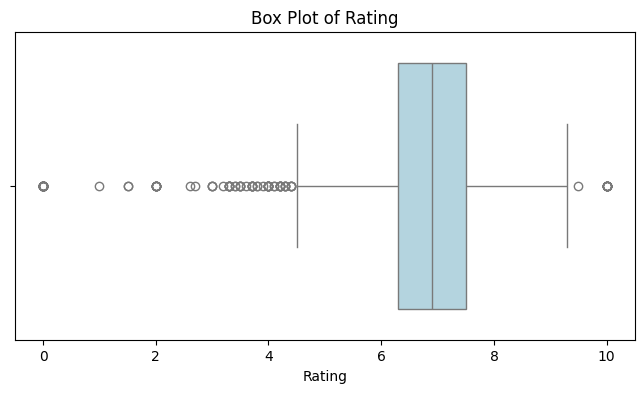

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=df['rating'], color='lightblue')
plt.title('Box Plot of Rating')
plt.xlabel('Rating')
plt.show()


* Rating

* Ratings mostly range between 6–8.

* Outliers (very low or very high ratings) are real events — some low ratings have few votes, high ratings represent top-performing content.

* No changes needed, as all outliers reflect actual audience feedback.

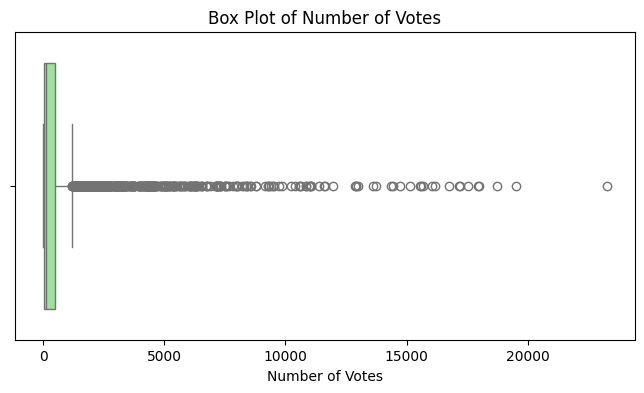

In [50]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['num_votes'], color='lightgreen')
plt.title('Box Plot of Number of Votes')
plt.xlabel('Number of Votes')
plt.show()


* Number of Votes (num_votes)

* Distribution is highly skewed with some titles receiving thousands of votes.

* These high values are legitimate popular content.

* No changes needed; outliers represent real audience engagement.

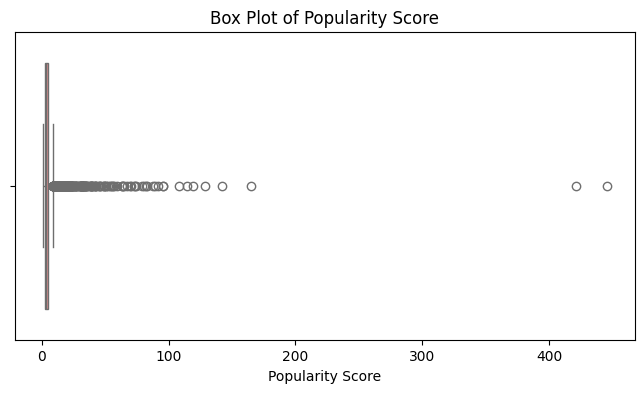

In [51]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['popularity_score'], color='lightcoral')
plt.title('Box Plot of Popularity Score')
plt.xlabel('Popularity Score')
plt.show()


* Popularity Score (popularity_score)

* Most titles have low to moderate popularity.

* Extremely high scores correspond to trending or viral content.

* No changes needed, as these outliers are meaningful events.

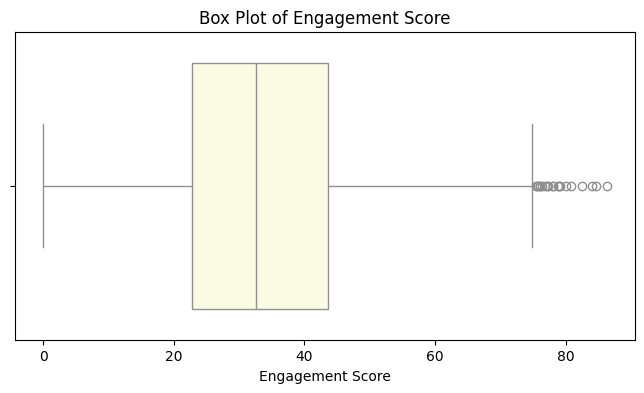

In [52]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['engagement_score'], color='lightyellow')
plt.title('Box Plot of Engagement Score')
plt.xlabel('Engagement Score')
plt.show()


* Engagement Score (engagement_score)

* Engagement is generally moderate for most content.

* Outliers are top hits combining high ratings and high vote counts.

* No changes needed — they represent real audience behavior.

* ## “All outliers represent real events in the dataset — either highly popular content, top-rated hits, or historical titles. No modifications or removals are necessary.”

In [54]:
df.dtypes

title                    object
type                     object
rating                  float64
num_votes                 int64
popularity_score        float64
language                 object
release_year              int32
rating_category        category
popularity_category    category
engagement_score        float64
vote_reliability       category
primary_genre            object
language_grouped         object
recent_release            int64
is_hit                    int64
dtype: object

* ## Type conversion

In [55]:
def fix_dtypes(df):
    """
    Clean up dtypes for Netflix dataset after reading from CSV.
    """
    # Convert text fields
    df['title'] = df['title'].astype("string")
    df['type'] = df['type'].astype("category")
    df['language'] = df['language'].astype("category")
    df['primary_genre'] = df['primary_genre'].astype("category")
    df['language_grouped'] = df['language_grouped'].astype("category")
    
    # Convert 0/1 integer flags to Boolean
    if 'recent_release' in df.columns:
        df['recent_release'] = df['recent_release'].astype(bool)
    if 'is_hit' in df.columns:
        df['is_hit'] = df['is_hit'].astype(bool)
    
    return df



| Column             | Original dtype | New dtype | Reason for Change                                                                                     |
| ------------------ | -------------- | --------- | ----------------------------------------------------------------------------------------------------- |
| `title`            | object         | string    | Title is free text; using `string` is more explicit and modern than generic `object`.                 |
| `type`             | object         | category  | Only two unique values (“Movie”, “TV Show”); `category` improves memory and makes grouping efficient. |
| `language`         | object         | category  | Repeated values; converting to `category` reduces memory usage and speeds up analysis.                |
| `primary_genre`    | object         | category  | Finite set of genres; `category` improves memory usage and speeds up groupby/aggregation.             |
| `language_grouped` | object         | category  | Few repeated language groups; `category` improves memory and analysis performance.                    |
| `recent_release`   | int64          | bool      | Represents True/False; `bool` improves clarity and memory efficiency.                                 |
| `is_hit`           | int64          | bool      | Represents True/False; `bool` improves clarity and memory efficiency.                                 |



## Final checks of clean data

In [56]:
df.dtypes

title                    object
type                     object
rating                  float64
num_votes                 int64
popularity_score        float64
language                 object
release_year              int32
rating_category        category
popularity_category    category
engagement_score        float64
vote_reliability       category
primary_genre            object
language_grouped         object
recent_release            int64
is_hit                    int64
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3990 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                3990 non-null   object  
 1   type                 3990 non-null   object  
 2   rating               3990 non-null   float64 
 3   num_votes            3990 non-null   int64   
 4   popularity_score     3990 non-null   float64 
 5   language             3990 non-null   object  
 6   release_year         3990 non-null   int32   
 7   rating_category      3990 non-null   category
 8   popularity_category  3990 non-null   category
 9   engagement_score     3990 non-null   float64 
 10  vote_reliability     3990 non-null   category
 11  primary_genre        3990 non-null   object  
 12  language_grouped     3990 non-null   object  
 13  recent_release       3990 non-null   int64   
 14  is_hit               3990 non-null   int64   
dtypes: category(3), float64(3)

In [58]:
df.describe()

,rating,num_votes,popularity_score,release_year,engagement_score,recent_release,is_hit
count,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000
mean,6.851604,725.011529,5.696204,2018.938596,33.671707,0.439850,0.056642
std,1.125716,1865.851371,13.057032,7.125455,14.991280,0.496431,0.231185
min,0.000000,0.000000,1.002700,1962.000000,0.000000,0.000000,0.000000
25%,6.300000,29.000000,2.567750,2018.000000,22.810000,0.000000,0.000000
50%,6.900000,112.000000,3.435950,2021.000000,32.540000,0.000000,0.000000
75%,7.500000,500.000000,5.189450,2023.000000,43.647500,1.000000,0.000000
max,10.000000,23257.000000,445.466800,2025.000000,86.250000,1.000000,1.000000


In [59]:
df.shape

(3990, 15)

In [60]:
print("\n Missing Values:\n")
print(df.isnull().sum())



 Missing Values:

title                  0
type                   0
rating                 0
num_votes              0
popularity_score       0
language               0
release_year           0
rating_category        0
popularity_category    0
engagement_score       0
vote_reliability       0
primary_genre          0
language_grouped       0
recent_release         0
is_hit                 0
dtype: int64


In [61]:
duplicates = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicates}")


 Duplicate Rows: 0


In [62]:
categorical_cols = ['type', 'primary_genre', 'language_grouped', 'rating_category', 'popularity_category', 'vote_reliability']
for col in categorical_cols:
    print(f"\nColumn: {col} - Unique Values: {df[col].unique()}")



Column: type - Unique Values: ['Movie' 'TV Show']

Column: primary_genre - Unique Values: ['Action' 'Family' 'Romance' 'Animation' 'Horror' 'Documentary' 'Comedy'
 'Thriller' 'Drama' 'Fantasy' 'Crime' 'Science Fiction' 'Adventure' 'War'
 'Mystery' 'Western' 'Music' 'TV Movie' 'History' 'Unknown'
 'Sci-Fi & Fantasy' 'Action & Adventure' 'Reality' 'Kids' 'Talk' 'Soap'
 'War & Politics']

Column: language_grouped - Unique Values: ['Korean' 'English' 'French' 'Other' 'Hindi' 'Spanish' 'Japanese']

Column: rating_category - Unique Values: ['Average', 'Excellent', 'Good', 'Poor']
Categories (4, object): ['Poor' < 'Average' < 'Good' < 'Excellent']

Column: popularity_category - Unique Values: ['Very High', 'High', 'Medium', 'Low']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

Column: vote_reliability - Unique Values: ['Low', 'High', 'Medium', 'Very High']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


In [65]:
derived_cols = ['rating_category', 'popularity_category', 'engagement_score', 'vote_reliability', 'recent_release', 'is_hit']
print("\n Derived Columns Check:")
for col in derived_cols:
    if col in df.columns:
        print(f"{col} exists and dtype: {df[col].dtype}")
    else:
        print(f"{col} is missing!")



 Derived Columns Check:
rating_category exists and dtype: category
popularity_category exists and dtype: category
engagement_score exists and dtype: float64
vote_reliability exists and dtype: category
recent_release exists and dtype: int64
is_hit exists and dtype: int64


## Final Checks Completed. Dataset is ready for analysis!

In [66]:
# Save the cleaned dataframe to a CSV file
df.to_csv("netflix_cleaned_data.csv", index=False)

print("Cleaned dataset saved as 'netflix_cleaned_data.csv'")


Cleaned dataset saved as 'netflix_cleaned_data.csv'


In [67]:
df = pd.read_csv(r'netflix_cleaned_data.csv')
df

,title,type,rating,num_votes,popularity_score,language,release_year,rating_category,popularity_category,engagement_score,vote_reliability,primary_genre,language_grouped,recent_release,is_hit
0,Mantis,Movie,5.8,29,445.4668,Korean,2025,Average,Very High,19.73,Low,Action,Korean,1,0
1,KPop Demon Hunters,Movie,8.3,1543,142.4078,English,2025,Excellent,Very High,60.94,High,Family,English,1,1
2,French Lover,Movie,5.5,60,95.2856,French,2025,Average,Very High,22.61,Low,Romance,French,1,0
3,Ice Road: Vengeance,Movie,6.4,433,80.2498,English,2025,Average,Very High,38.87,Medium,Action,English,1,0
4,Ruth & Boaz,Movie,7.2,19,69.5096,English,2025,Good,Very High,21.57,Low,Romance,English,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,Let's Fight Ghost,TV Show,7.7,12,1.5461,Thai,2021,Good,Low,19.75,Low,Action & Adventure,Other,0,0
3986,Feria: The Darkest Light,TV Show,6.6,227,1.2713,Spanish,2022,Good,Low,35.83,Medium,Sci-Fi & Fantasy,Spanish,1,0
3987,The Greatest Rivalry: India vs Pakistan,TV Show,7.2,5,1.6059,English,2025,Good,Low,12.90,Low,Documentary,English,1,0
3988,Island of the Sea Wolves,TV Show,8.5,67,1.7997,English,2022,Excellent,Low,35.87,Low,Documentary,English,1,0


In [68]:
df = fix_dtypes(df)

In [69]:
df.dtypes

title                  string[python]
type                         category
rating                        float64
num_votes                       int64
popularity_score              float64
language                     category
release_year                    int64
rating_category                object
popularity_category            object
engagement_score              float64
vote_reliability               object
primary_genre                category
language_grouped             category
recent_release                   bool
is_hit                           bool
dtype: object